In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!pip install pandas
!pip install kneed
from kneed import KneeLocator
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from statsmodels.iolib.summary2 import summary_col

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl

In [3]:
# csv import
data = pd.read_csv("Red Wine Quality.csv", low_memory=False)

In [107]:
# listing the missing values
missing = []
unique = []
types = []
variables = []
count = []

for item in data.columns:
    variables.append(item)
    missing.append(data[item].isnull().sum())
    unique.append(data[item].nunique())
    types.append(data[item].dtypes)
    count.append(len(data[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,fixed acidity,float64,1599,96,0
1,volatile acidity,float64,1599,143,0
2,citric acid,float64,1599,80,0
3,residual sugar,float64,1599,91,0
4,chlorides,float64,1599,153,0
5,free sulfur dioxide,int64,1599,57,0
6,total sulfur dioxide,int64,1599,143,0
7,density,float64,1599,436,0
8,pH,float64,1599,89,0
9,sulphates,float64,1599,96,0


In [109]:
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [5]:
#data.to_csv('Red Wine Quality.csv', index=False)
Newdata = data

In [ ]:
# plotting the correlation matrix
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

# Linear Regression

In [106]:
Newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


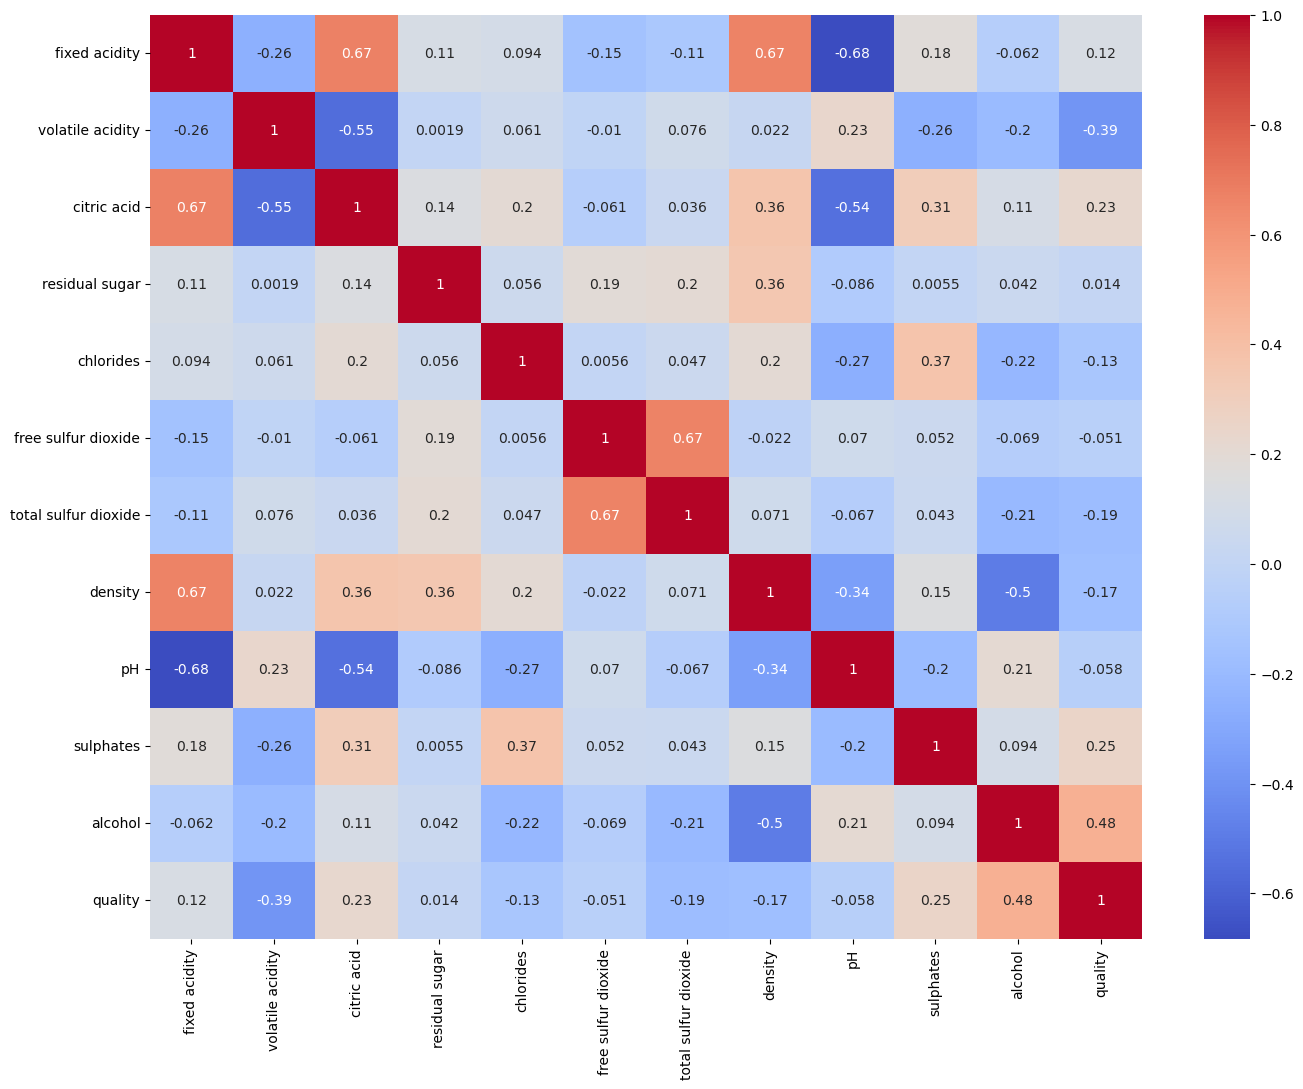

In [108]:
# plot the correlation matrix to see the correlation & relationship of the variable
correlations = Newdata.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

# Before removing Multicollinearity

In [ ]:
x = Newdata[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
             "total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = Newdata["quality"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(ytest, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(ytest, y_pred)
print("R-squared:", r2)

# After removing Multicollinearity

In [6]:
# selecting Score as the dependent/output variable and other variables as Target/input variables
x = Newdata[["volatile acidity","citric acid","residual sugar","chlorides","total sulfur dioxide","density","pH","sulphates",
            "alcohol"]]
y = Newdata["quality"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [8]:
y_pred = model.predict(xtest)

In [9]:
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(ytest, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(ytest, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.41264599425083215
Root Mean Squared Error: 0.6423752752486915
Mean Absolute Error: 0.5158609551169671
R-squared: 0.34916287025929993


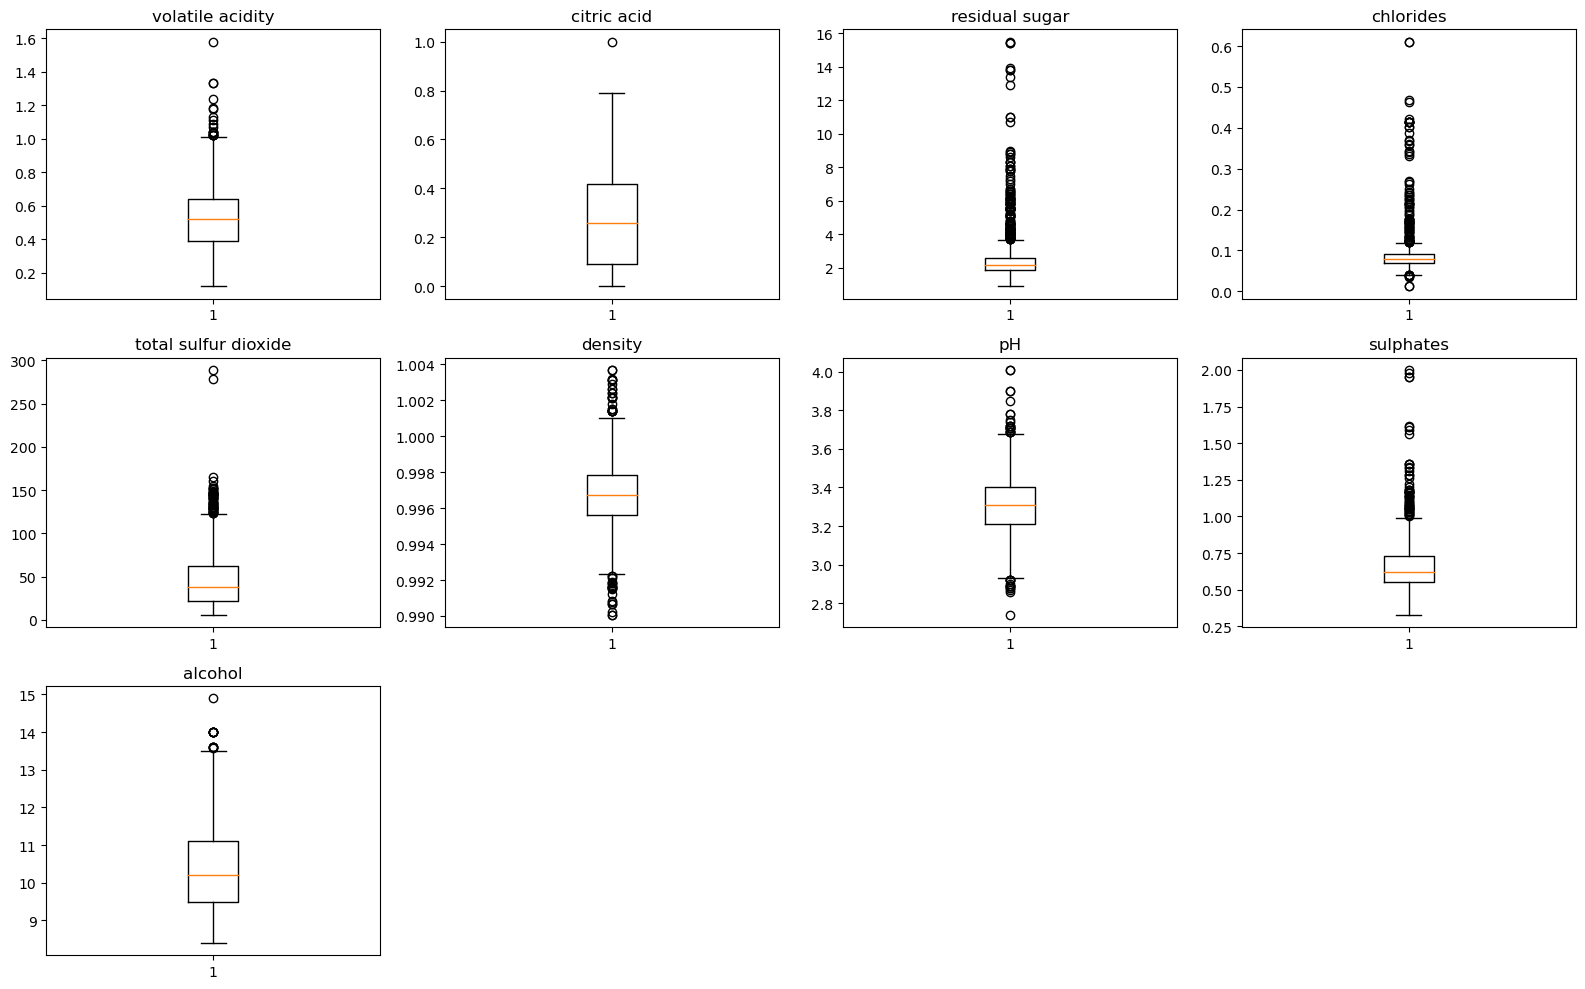

In [10]:
# visualize outliers in these columns
columns_to_visualize = ["volatile acidity", "citric acid", "residual sugar","chlorides","total sulfur dioxide", "density","pH",
                        "sulphates", "alcohol"]

# Create box plots for each column
plt.figure(figsize=(16, 10))
for column in columns_to_visualize:
    plt.subplot(3, 4, columns_to_visualize.index(column) + 1)
    plt.boxplot(Newdata[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:
# Create a copy of the original DataFrame to avoid modifying the original data
Newdata_no_outliers = Newdata.copy()

# Columns to remove outliers from
columns_to_remove_outliers = ["volatile acidity", "citric acid", "residual sugar","chlorides","total sulfur dioxide", "density",
                               "pH", "sulphates", "alcohol"]

# Loop through each column
for column in columns_to_remove_outliers:
    # Calculate the IQR for the column
    Q1 = Newdata[column].quantile(0.25)
    Q3 = Newdata[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define thresholds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the column
    Newdata_no_outliers = Newdata_no_outliers[(Newdata_no_outliers[column] >= lower_bound) &
                                              (Newdata_no_outliers[column] <= upper_bound)]

# Reset the index of the cleaned DataFrame
Newdata_no_outliers.reset_index(drop=True, inplace=True)

In [18]:
#Newdata_no_outliers.to_csv('newdataafterremoveoutlr.csv', index=False)

# Visualize after removing outliers

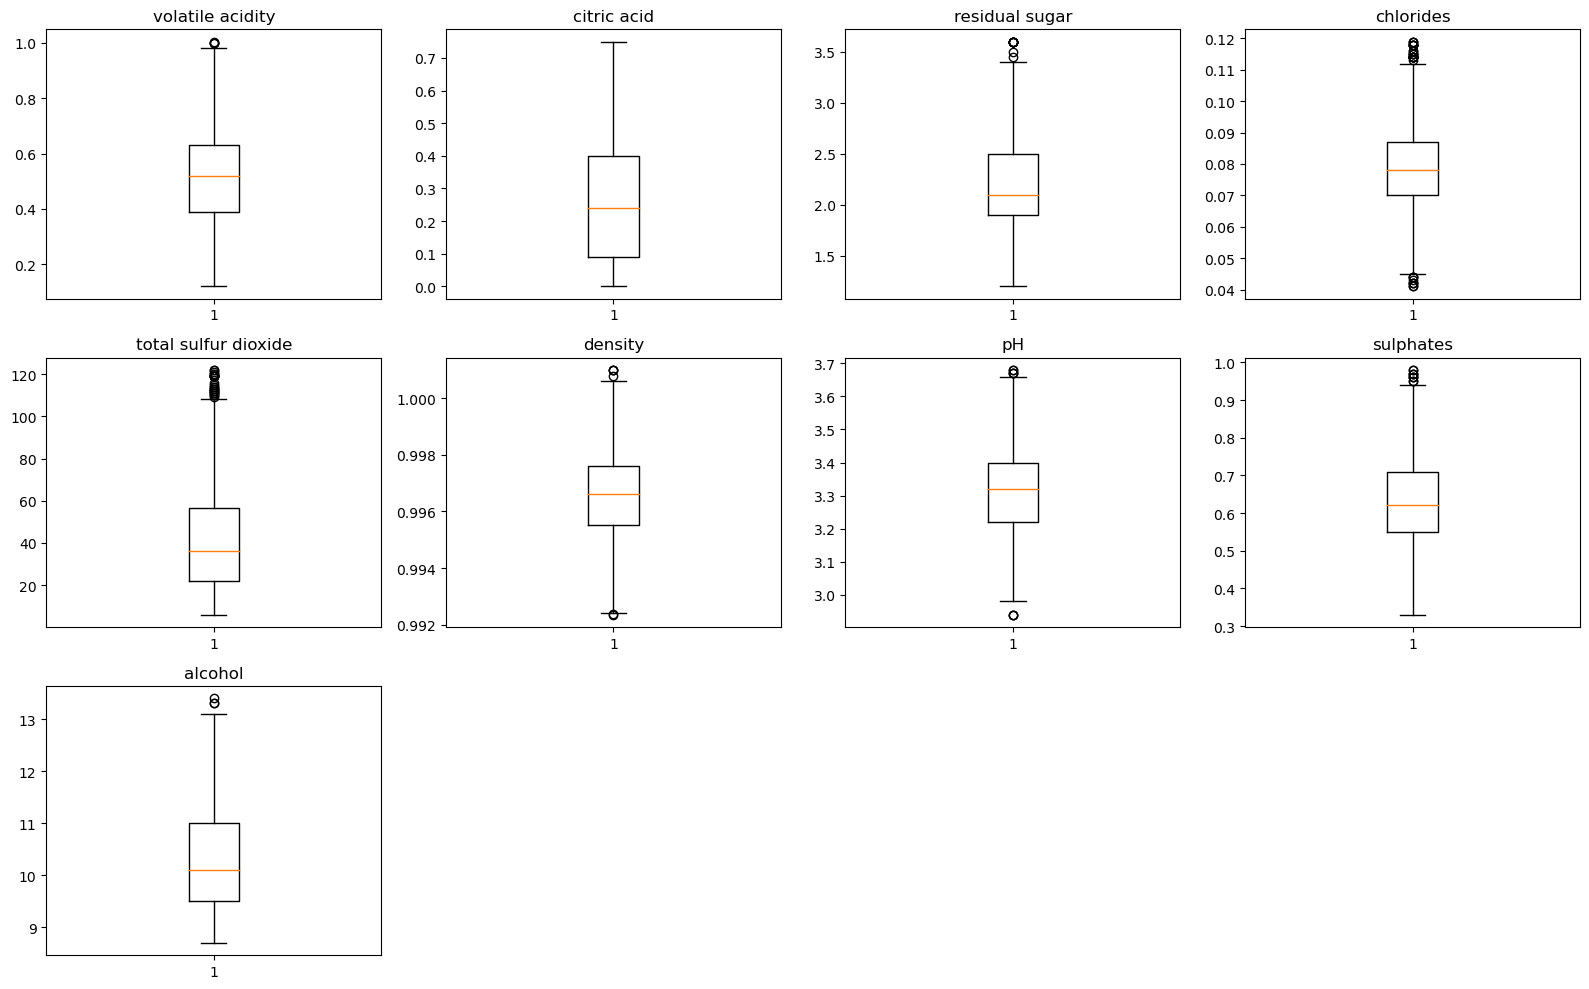

In [12]:
# Assuming you have a DataFrame named "Newdata" and you want to visualize outliers in these columns
columns_to_visualize = ["volatile acidity", "citric acid", "residual sugar",
                         "chlorides","total sulfur dioxide", "density",
                         "pH", "sulphates", "alcohol"]

# Create box plots for each column
plt.figure(figsize=(16, 10))
for column in columns_to_visualize:
    plt.subplot(3, 4, columns_to_visualize.index(column) + 1)
    plt.boxplot(Newdata_no_outliers[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Results of Linear Regression

In [17]:
# selecting Score as the dependent/output variable and other variables as Target/input variables
x = Newdata_no_outliers[["volatile acidity","citric acid","residual sugar","chlorides","total sulfur dioxide","density","pH",
                         "sulphates","alcohol"]]
y = Newdata_no_outliers["quality"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print("Coefficients:", model.coef_)

print("Intercept:", model.intercept_)

# Calculate residuals
residuals = ytest - y_pred
# Calculate RSS (Residual Sum of Squares)
rss = np.sum(residuals ** 2)
print("Residual Sum of Squares (RSS):", rss)

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(ytest, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(ytest, y_pred)
print("R-squared:", r2)

Coefficients: [-7.58834550e-01 -1.55111092e-01  1.20975055e-02 -2.23860844e+00
 -2.50549910e-03 -2.88141088e+01 -8.44916884e-01  1.85540532e+00
  2.61529148e-01]
Intercept: 33.979484234789574
Residual Sum of Squares (RSS): 130.5149727626294
Mean Squared Error: 0.35179237941409547
Root Mean Squared Error: 0.5931208809459464
Mean Absolute Error: 0.46755334863489284
R-squared: 0.3812163919780258


# Logistic Regression

In [67]:
df_logistic = Newdata_no_outliers[["volatile acidity","citric acid","residual sugar","chlorides","total sulfur dioxide",
                                   "density","pH","sulphates","alcohol","quality"]]

In [68]:
# Categorize the "quality" variable
df_logistic["quality_Categorized"] = pd.cut(df_logistic["quality"], bins=[0, 3, 6, 8], labels=["Low quality wine", "Medium quality wine", "High quality wine"])

C:\Users\Yasas Jayasinghe\AppData\Local\Temp\ipykernel_6220\644137932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic["quality_Categorized"] = pd.cut(df_logistic["quality"], bins=[0, 3, 6, 8], labels=["Low quality wine", "Medium quality wine", "High quality wine"])


In [70]:
# Perform one-hot encoding for the input variables
df_without_quality = df_logistic.drop(["quality", "quality_Categorized"], axis=1)
model_encoded = pd.get_dummies(df_without_quality, columns=['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                                                  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [72]:
# Combine encoded variables with the "quality_Categorized" categorical variable
df_encoded = pd.concat([model_encoded, df_logistic['quality_Categorized']], axis=1)

In [73]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop("quality_Categorized", axis=1)
y = df_encoded["quality_Categorized"]

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#df_encoded.to_csv('dfencode.csv', index=False)

In [77]:
# Create and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [78]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [79]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Results of Logistic Regression

In [80]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.889487870619946
Precision: 0.8758624569730509
Recall: 0.889487870619946
F1 Score: 0.87997007957286


In [81]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[ 18  28]
 [ 13 312]]


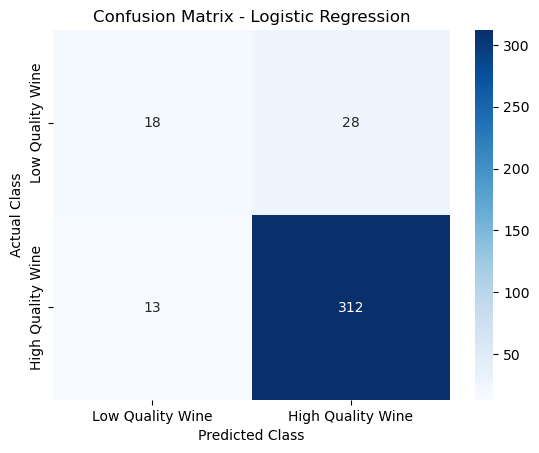

In [118]:
# Assuming you have the confusion matrix stored in confusion_mat
class_labels = ["Low Quality Wine", "High Quality Wine"]

sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest

In [83]:
df_random = Newdata_no_outliers[["volatile acidity","citric acid","residual sugar","chlorides","total sulfur dioxide","density"
                                 ,"pH","sulphates","alcohol","quality"]]

In [84]:
# Categorize the "quality" variable
df_random["quality_Categorized"] = pd.cut(df_random["quality"], bins=[0, 3, 6, 8], labels=["Low quality wine", "Medium quality wine", "High quality wine"])

C:\Users\Yasas Jayasinghe\AppData\Local\Temp\ipykernel_6220\1908312305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random["quality_Categorized"] = pd.cut(df_random["quality"], bins=[0, 3, 6, 8], labels=["Low quality wine", "Medium quality wine", "High quality wine"])


In [85]:
# Perform one-hot encoding for the input variable
df_without_quality = df_random.drop(["quality", "quality_Categorized"], axis=1)
model_encoded = pd.get_dummies(df_without_quality, columns=['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                                                  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [86]:
# Combine the encoded "Model" variable with "Consumer Rating"
df_encoded = pd.concat([model_encoded, df_random['quality_Categorized']], axis=1)

In [91]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop("quality_Categorized", axis=1)
y = df_encoded["quality_Categorized"]

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [95]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Predict on the test set
y_pred_RF = rf_classifier.predict(X_test)

In [97]:
trees = rf_classifier.estimators_
# Getting the maximum depth of each tree
max_depths = [tree.tree_.max_depth for tree in trees]

# Printing the maximum depth of each tree
for i, depth in enumerate(max_depths):
    print(f"Tree {i+1} maximum depth: {depth}")
    
n_estimators = rf_classifier.n_estimators

# Printing the number of estimators
print(f"Number of estimators: {n_estimators}")

Tree 1 maximum depth: 58
Tree 2 maximum depth: 57
Tree 3 maximum depth: 48
Tree 4 maximum depth: 50
Tree 5 maximum depth: 55
Tree 6 maximum depth: 50
Tree 7 maximum depth: 45
Tree 8 maximum depth: 50
Tree 9 maximum depth: 50
Tree 10 maximum depth: 64
Tree 11 maximum depth: 49
Tree 12 maximum depth: 46
Tree 13 maximum depth: 52
Tree 14 maximum depth: 52
Tree 15 maximum depth: 47
Tree 16 maximum depth: 69
Tree 17 maximum depth: 46
Tree 18 maximum depth: 49
Tree 19 maximum depth: 43
Tree 20 maximum depth: 50
Tree 21 maximum depth: 51
Tree 22 maximum depth: 63
Tree 23 maximum depth: 43
Tree 24 maximum depth: 51
Tree 25 maximum depth: 54
Tree 26 maximum depth: 54
Tree 27 maximum depth: 64
Tree 28 maximum depth: 51
Tree 29 maximum depth: 54
Tree 30 maximum depth: 57
Tree 31 maximum depth: 58
Tree 32 maximum depth: 57
Tree 33 maximum depth: 56
Tree 34 maximum depth: 56
Tree 35 maximum depth: 49
Tree 36 maximum depth: 50
Tree 37 maximum depth: 51
Tree 38 maximum depth: 46
Tree 39 maximum depth

In [98]:
# Calculate accuracy
RF_accuracy = accuracy_score(y_test, y_pred_RF)

# Calculate precision
RF_precision = precision_score(y_test, y_pred_RF, average='macro')

# Calculate recall
RFrecall = recall_score(y_test, y_pred_RF, average='macro')

# Calculate F1 score
RF_f1 = f1_score(y_test, y_pred_RF, average='macro')

# Results of Random Forest

In [99]:
print("RF Accuracy:", RF_accuracy)
print("RF Precision:", RF_precision)
print("RF Recall:", RFrecall)
print("RF F1 Score:", RF_f1)

RF Accuracy: 0.9110512129380054
RF Precision: 0.9539106145251397
RF Recall: 0.6413043478260869
RF F1 Score: 0.6961808571357669


In [100]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_RF)

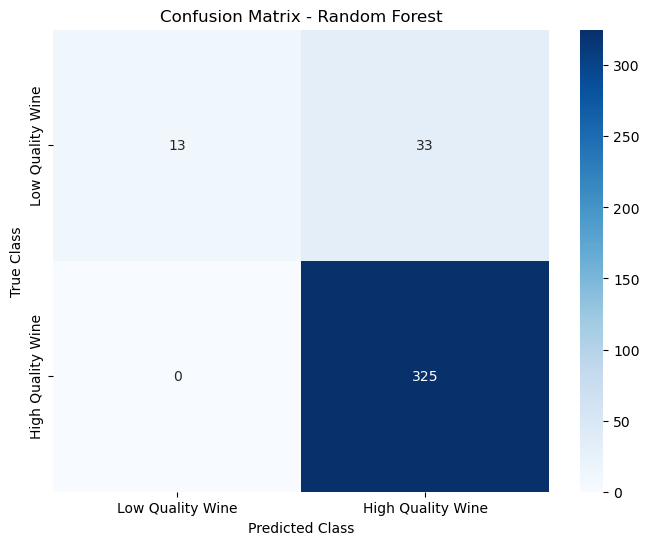

In [116]:
# Plot confusion matrix
class_labels = ["Low Quality Wine", "High Quality Wine"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Average Accuracy Scores of two models

# Random Forest

In [102]:
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

C:\Users\Yasas Jayasinghe\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.87854251 0.88259109 0.87044534 0.87449393 0.87044534]
Average Accuracy: 0.8753036437246964


# Logistic Regression

In [103]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

C:\Users\Yasas Jayasinghe\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.88259109 0.88259109 0.85020243 0.85425101 0.8582996 ]
Average Accuracy: 0.8655870445344129


In [104]:
feature_names = x.columns 
coefficients = model.coef_[0]

# Create a dictionary to store feature names and coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort the dictionary by absolute coefficient values in descending order
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature names and their corresponding coefficients
for feature, coefficient in sorted_features:
    print(feature, ":", coefficient)

density : 0.5075712666697191
volatile acidity : 0.3426087686846112
sulphates : -0.20640123805156202
citric acid : -0.1688486563797179
pH : 0.1284756899847719
alcohol : 0.058828005441127804
chlorides : -0.025975380704235707
residual sugar : -0.020635302908439325
total sulfur dioxide : 0.0


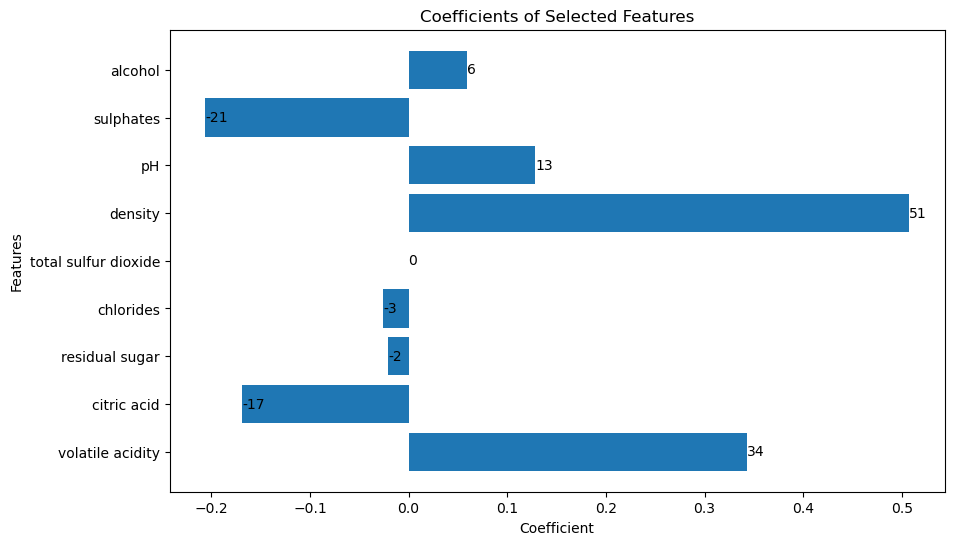

In [105]:
# Select the features to plot
features = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 
            'sulphates', 'alcohol']

# Get the corresponding coefficients for the selected features
coefficients = [feature_coefficients[feature] for feature in features]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Coefficients of Selected Features')

# Add values to each bar
for i, v in enumerate(coefficients):
    plt.text(v, i, int(round(v, 2)*100), color='black', va='center')

plt.show()